# Demonstrate Nucleosome Clustering with the Sliding Nucleosome Model

Simulation of the sliding nucleosome model with the following parameters:

- Number of marks: 1
- Correlation in methylation pattern: FALSE
- Maximum number of binders per mark: 2

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([-9.5])

# Generate a methylation sequence
n_beads = 500
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
linker_lengths = np.ones(marks.shape[0])
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

In [4]:
# Print the methylation pattern
print("Methylation Pattern (flattened, single mark):\n")
print(marks.flatten())

Methylation Pattern (flattened, single mark):

[1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 

#### Initialize the Nucleosome Array

In [5]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

#### Specify Simulation Parameters

In [6]:
out_dir = "output"
n_steps = 5000
n_save = 1

#### Run the Simulation

In [7]:
mc.mc_linkers(nuc_arr, n_save, n_steps, out_dir)

#### Inspect Configuration

In [8]:
# Extract the linker length distribution
linker_lengths = nuc_arr.linker_lengths

# Print the linker lengths
print("Linker Lengths:")
print(linker_lengths)

Linker Lengths:
[  7.  54.  14.  59.   8.  12. 131. 107.   7.  62.  35.  20.  79.   1.
 142.   3.   7.  61.   4.  40.  55.  84.  19.  34.  54.  13.  12.   7.
  14.  44.  18.   2.  28. 162.  23.  39.  42.  19.  13.  11.  11. 184.
  28.   2.   1. 104.   8. 171.  48.   6.  75.  12.  32.  26. 121.   2.
  10.  28. 214. 103.  30.  11.   3.   9.  78.  38.  53.  67.  48. 255.
 117.   1.   4.  89.  93.  28.  92.   1.   5.  12.  30.  11.   1.   4.
  12. 139.  11.  80.  94.  43.  44.  36.  37.  95. 117.  46.   8.   9.
  16.  75.  46.  97.  37.  43.  34.  70.   5.  33.   6.   3. 181.  39.
  30.   2.  69.  32. 224.  57.  85.  26.  39.  56. 143.  19. 138.   5.
  98.  71.  11.  24.  40. 101.   5.  16.  21. 235. 191. 218. 195.   3.
  26.  34.  24.   6.  14.   3.  33.  31.  85.  21.  65.  22.  10.  81.
  27.  52.  81.   6.  26.  36.  74. 174.  17. 134.  68.  13.  86. 169.
  57.   2.  65.   1.  92.   8.  19.  91.  93. 122.  16.  10.   5.  25.
  23.   4. 103.  41.  23.   5.  12.  40.  13.  30. 100.  98. 

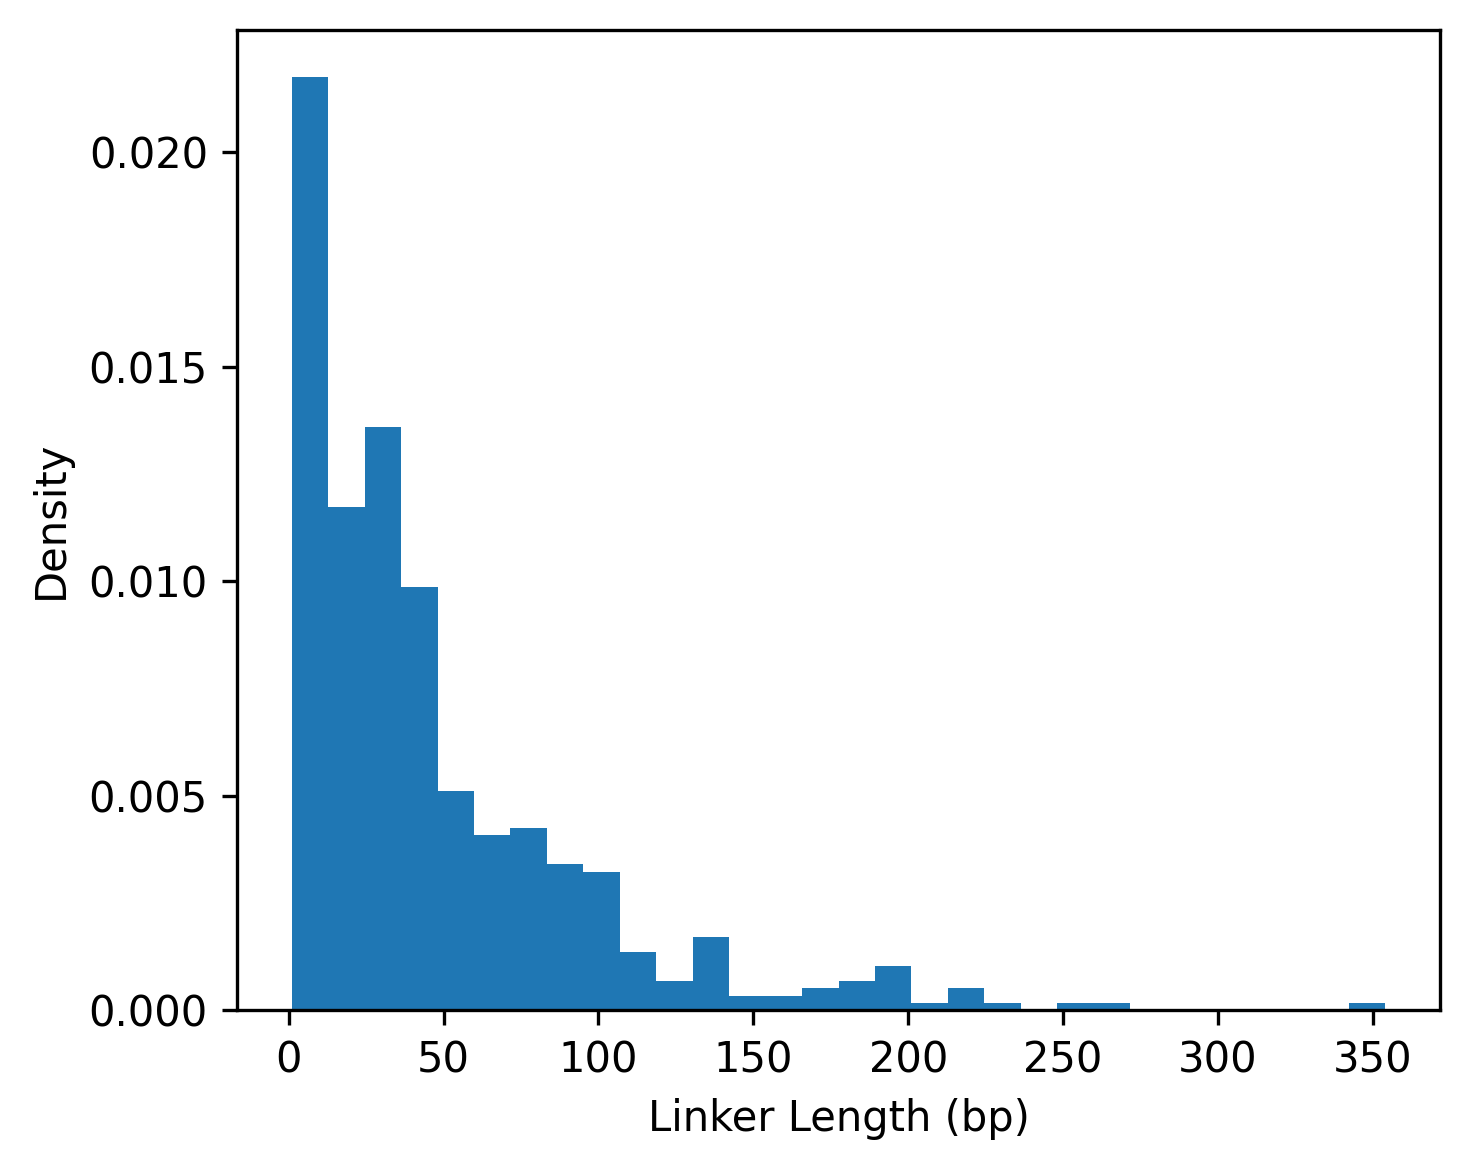

In [9]:
# Plot the linker length distribution
nbins = 30
plt.figure(figsize=(5,4), dpi=300)
plt.hist(linker_lengths, bins=nbins, density=True)
plt.xlabel("Linker Length (bp)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

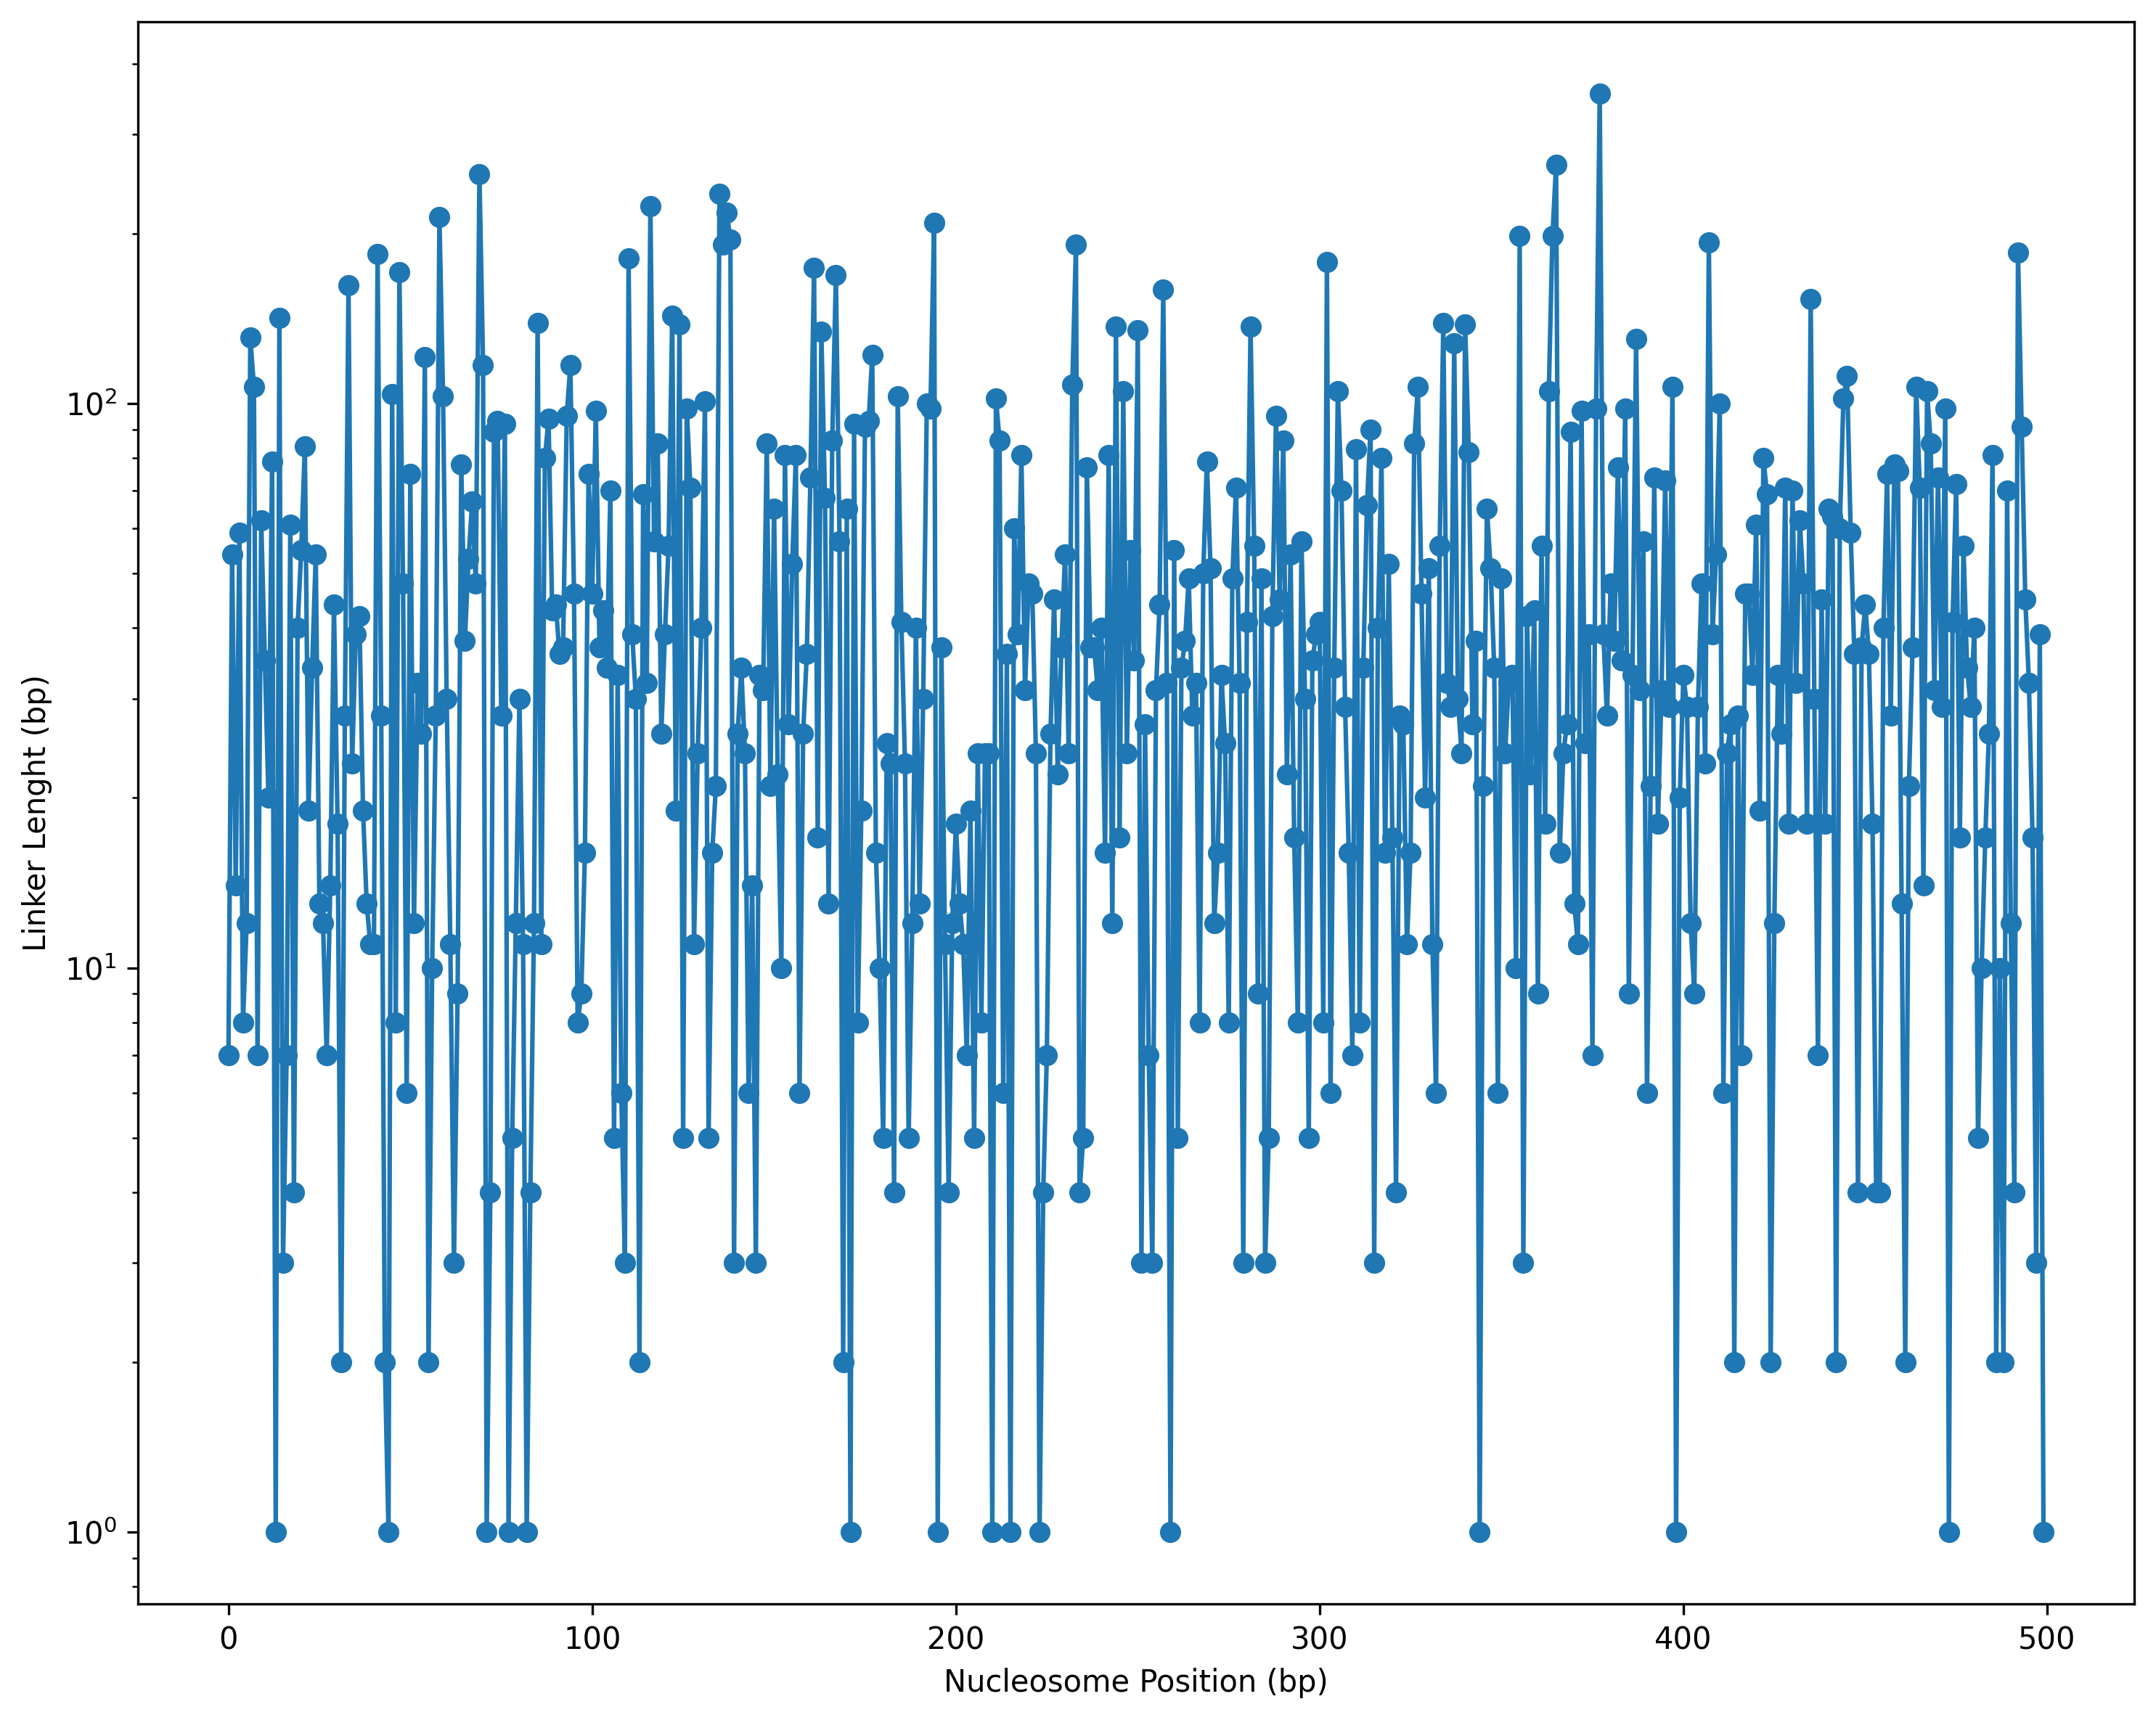

In [10]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()

#### Next Steps

- The cutoff interaction length (15.1 nm) comes from the dinucleosome paper (Machida et al. 2018)
- Try the following fractions methylated: 0.06, 0.08, 0.10
- Vary the chemical potential to get the full dynamic range for the binding isotherm (should be somewhere around -9.0 kT)
- Vary nucleosome array lengths to ensure that chain length is not affecting function
- Use WLC-stat to generate nucleosome configurations for each linker profile
- Find chemical potentials that generate partial clumping of the chromatin fiber
- Generate PDB images of chromatin configurations, and look at cluster distributions
- Mimic analysis from Clodagh C O'Shea's ChromEMT paper to compare our simulated euchromatin clustering results with experiments